In [39]:
import pandas as pd

df = pd.read_csv('C:\\Users\\pragya\\Downloads\\Iteration 3\\specie_sound.csv')

In [40]:
df.head()

links                  specie
0  C:\Users\pragya\Downloads\Iteration 3\new holl...  New Holland Honeyeater
1  C:\Users\pragya\Downloads\Iteration 3\new holl...  New Holland Honeyeater
2  C:\Users\pragya\Downloads\Iteration 3\new holl...  New Holland Honeyeater
3  C:\Users\pragya\Downloads\Iteration 3\new holl...  New Holland Honeyeater
4  C:\Users\pragya\Downloads\Iteration 3\new holl...  New Holland Honeyeater

In [41]:
df.links[0]

'C:\\Users\\pragya\\Downloads\\Iteration 3\\new holland honeyeater\\328859.wav'

In [42]:
df.specie.value_counts()

New Holland Honeyeater      59
Australian Magpie           35
Australian Raven            35
Grey Butcherbird            35
Noisy Miner                 35
Sulphur Crested Cockatoo    35
White Napped Honeyeater     34
Silvereye                   34
Grey Fantail                33
Crested Pigeon              31
Australian King Parrot      30
Eastern Spinebill           30
Cats                        29
Dogs                        19
Brown Headed Honeyeater     18
Name: specie, dtype: int64

In [43]:
import IPython.display as ipd
filepath = df['links'][0]
ipd.Audio(filepath)

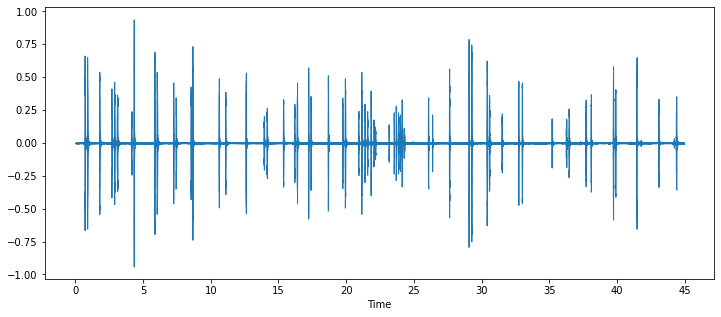

In [44]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

data, sample_rate = librosa.load(filepath)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(data, sr=sample_rate)

In [45]:
data

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
       -2.8844079e-05,  3.0578369e-05,  0.0000000e+00], dtype=float32)

In [46]:
sample_rate

22050

48000
[ 0  0  0 ...  3  1 -3]


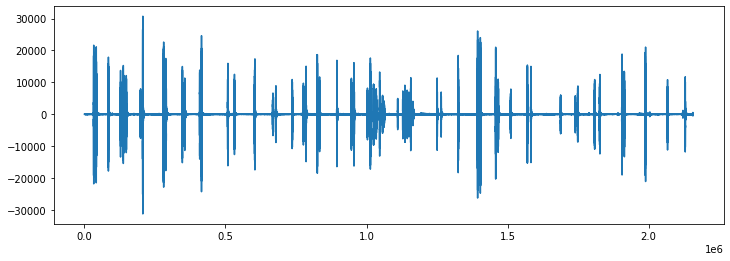

In [47]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filepath)
print(wave_sample_rate)
print(wave_audio)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [48]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)
print(mfccs)

(40, 1936)
[[-6.0648456e+02 -5.4273853e+02 -4.9883902e+02 ... -4.8275168e+02
  -4.7889972e+02 -4.7713571e+02]
 [ 7.7013702e+00  4.4542492e+01  3.7278271e+01 ...  8.4085503e+01
   6.6827881e+01  4.5625381e+01]
 [-7.2048175e-01 -3.4792664e+00 -4.5681114e+00 ... -5.0307107e+00
   8.3761311e-01  1.5955346e+01]
 ...
 [-9.4621384e-01  6.8487871e-01  1.9443581e+00 ...  7.7103114e+00
   7.3374052e+00  1.1514690e+01]
 [-4.6757221e-01  3.2809477e+00  3.1024899e+00 ...  2.4908016e+00
   3.8959281e+00  5.3449283e+00]
 [ 7.7467698e-01  3.1368113e+00  3.7634127e+00 ... -4.7086757e-01
  -2.7147551e+00  2.3480535e+00]]


In [49]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [50]:
from tqdm import tqdm
import os 
import numpy as np

extracted_features=[]

for index_num,row in tqdm(df.iterrows()):
    
    file_name = os.path.join(row["links"])
    final_class_labels=row["specie"]
    data=features_extractor(file_name)
    
    extracted_features.append([row["links"].strip("C:\\Users\\pragya\\Downloads\\Iteration 3\\"), data,final_class_labels])

454it [05:12,  9.85it/s]C:\ProgramData\Anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
492it [05:13,  1.57it/s]


In [51]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['file_name','feature','specie'])
extracted_features_df.head()

file_name  \
0                      holland honeyeater\328859.wav   
1                      holland honeyeater\354735.wav   
2                      holland honeyeater\370620.wav   
3  holland honeyeater\XC104917 - New Holland Hone...   
4  holland honeyeater\XC104918 - New Holland Hone...   

                                             feature                  specie  
0  [-472.53397, 43.075203, -6.789457, 21.450113, ...  New Holland Honeyeater  
1  [-359.92935, 12.354678, -74.88075, 24.984184, ...  New Holland Honeyeater  
2  [-575.1593, 38.399807, 33.309, 29.102974, -1.0...  New Holland Honeyeater  
3  [-426.14066, 91.62512, 19.335293, 42.49482, 19...  New Holland Honeyeater  
4  [-420.4377, 72.12475, 11.187586, 50.887306, 11...  New Holland Honeyeater

In [52]:
extracted_features_df = pd.concat([extracted_features_df['file_name'],extracted_features_df['specie'], extracted_features_df['feature'].apply(pd.Series)], axis = 1)

In [53]:
original_df = extracted_features_df

In [54]:
original_df.head()

file_name                  specie  \
0                      holland honeyeater\328859.wav  New Holland Honeyeater   
1                      holland honeyeater\354735.wav  New Holland Honeyeater   
2                      holland honeyeater\370620.wav  New Holland Honeyeater   
3  holland honeyeater\XC104917 - New Holland Hone...  New Holland Honeyeater   
4  holland honeyeater\XC104918 - New Holland Hone...  New Holland Honeyeater   

            0          1          2          3          4          5  \
0 -472.533966  43.075203  -6.789457  21.450113 -12.705062  19.729376   
1 -359.929352  12.354678 -74.880753  24.984184 -70.570374 -20.947077   
2 -575.159302  38.399807  33.308998  29.102974  -1.037086  35.893322   
3 -426.140656  91.625122  19.335293  42.494820  19.241476  32.700485   
4 -420.437714  72.124748  11.187586  50.887306  11.839478  20.919359   

           6          7  ...        30        31        32        33  \
0  12.826557  -3.253039  ... -1.846646 -2.778153 -0.297470 -1.127322   
1 -13.115354 -12.509544  ... -0.587778 -1.568036 -0.295287 -1.370173   
2  -6.628551  26.416567  ... -2.621852 -1.804235 -2.462680 -2.647598   
3  12.041158  18.610600  ...  5.307531  3.886939  6.374277  5.082355   
4  25.721346  20.778193  ...  4.090651  1.955263  2.686568  1.698515   

         34        35        36        37        38        39  
0  0.251037  0.637421  1.144642  0.298444  1.281538 -0.920709  
1  0.448355  0.227359  0.468265  1.537298  2.130192  1.852885  
2 -1.923331 -2.261360 -2.422113 -2.081385 -1.912434 -2.209412  
3  6.959673  5.401619  6.372511  4.218643  4.767789  2.458666  
4  2.660672  0.581645  1.048078 -0.280046  0.812281  1.035854  

[5 rows x 42 columns]

In [55]:
birds = ["Australian King Parrot", "Australian Magpie", "Australian Raven", "Crested Pigeon", "Eastern Spinebill", "Grey Butcherbird", "Grey Fantail", "Noisy Miner", "Silvereye", "Sulphur Crested Cockatoo"]
for i in range(len(extracted_features_df)):
    if extracted_features_df['specie'][i] in birds:
        extracted_features_df['specie'][i] = "Melbourne Skyline Bird"

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [56]:
not_birds = ["Cats", "Dogs"]
for i in range(len(extracted_features_df)):
    if extracted_features_df['specie'][i] in not_birds:
        extracted_features_df['specie'][i] = "Not Bird"

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [57]:
extracted_features_df.drop('file_name', axis = 1, inplace = True) 
extracted_features_df

specie           0           1          2          3  \
0    New Holland Honeyeater -472.533966   43.075203  -6.789457  21.450113   
1    New Holland Honeyeater -359.929352   12.354678 -74.880753  24.984184   
2    New Holland Honeyeater -575.159302   38.399807  33.308998  29.102974   
3    New Holland Honeyeater -426.140656   91.625122  19.335293  42.494820   
4    New Holland Honeyeater -420.437714   72.124748  11.187586  50.887306   
..                      ...         ...         ...        ...        ...   
487                Not Bird -165.783188  123.474236 -64.717674  30.375814   
488                Not Bird -502.491669   89.045006  -7.555145  26.462057   
489                Not Bird -189.371674   74.171883 -28.990292   4.247342   
490                Not Bird -220.045242  155.331940 -88.789902 -48.145771   
491                Not Bird -193.273438  222.109924 -84.590233   0.171070   

             4          5          6          7          8  ...        30  \
0   -12.705062  19.729376  12.826557  -3.253039   3.896755  ... -1.846646   
1   -70.570374 -20.947077 -13.115354 -12.509544 -23.142490  ... -0.587778   
2    -1.037086  35.893322  -6.628551  26.416567  -3.148077  ... -2.621852   
3    19.241476  32.700485  12.041158  18.610600   4.926517  ...  5.307531   
4    11.839478  20.919359  25.721346  20.778193   4.673748  ...  4.090651   
..         ...        ...        ...        ...        ...  ...       ...   
487  -7.400737  -5.247241 -15.988612 -10.854544   1.108413  ... -0.191381   
488  10.177627   9.361094  22.048353   2.274299  10.160676  ...  2.247934   
489 -32.255119  -0.673765  -9.976845 -10.751537 -25.073479  ...  1.586210   
490 -25.171099 -33.570961   2.591248   0.311519  -5.231259  ...  4.146472   
491 -17.767403 -40.798317  -3.295005 -22.386786  -5.594624  ...  4.974406   

           31        32        33        34        35        36        37  \
0   -2.778153 -0.297470 -1.127322  0.251037  0.637421  1.144642  0.298444   
1   -1.568036 -0.295287 -1.370173  0.448355  0.227359  0.468265  1.537298   
2   -1.804235 -2.462680 -2.647598 -1.923331 -2.261360 -2.422113 -2.081385   
3    3.886939  6.374277  5.082355  6.959673  5.401619  6.372511  4.218643   
4    1.955263  2.686568  1.698515  2.660672  0.581645  1.048078 -0.280046   
..        ...       ...       ...       ...       ...       ...       ...   
487  1.912205 -0.051392 -0.481966  1.064337 -1.439743  1.480140 -4.870686   
488  3.347770  1.909735  2.936213  2.753788  0.611217  2.824044  2.152072   
489  8.144016  1.750688 -3.843168  1.129804  0.302627 -1.174870 -2.117832   
490  2.107552  5.254559  2.734799 -0.177667  3.602654  2.549507 -0.255395   
491 -3.628003 -5.255287 -4.060673  1.446097  2.076731  2.483757  5.102865   

           38        39  
0    1.281538 -0.920709  
1    2.130192  1.852885  
2   -1.912434 -2.209412  
3    4.767789  2.458666  
4    0.812281  1.035854  
..        ...       ...  
487 -2.106869  0.344267  
488  0.473193  2.083273  
489 -2.816615  0.480501  
490  0.563055  3.295889  
491 -1.405592 -7.180974  

[492 rows x 41 columns]

In [58]:
extracted_features_df.specie.value_counts()

Melbourne Skyline Bird     333
New Holland Honeyeater      59
Not Bird                    48
White Napped Honeyeater     34
Brown Headed Honeyeater     18
Name: specie, dtype: int64

In [59]:
# check version number
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE

# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from matplotlib import pyplot
from numpy import where

# define dataset
X, y = extracted_features_df.loc[:, extracted_features_df.columns != 'specie'], extracted_features_df.specie
# summarize class distribution
counter = Counter(y)
print(counter)

from imblearn.over_sampling import RandomOverSampler
sampling_strategy = "not majority"
ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_res, y_res = ros.fit_resample(X, y)

0.7.0
Counter({'Melbourne Skyline Bird': 333, 'New Holland Honeyeater': 59, 'Not Bird': 48, 'White Napped Honeyeater': 34, 'Brown Headed Honeyeater': 18})


In [60]:
new = pd.DataFrame(X_res)
new['specie'] = y_res

In [61]:
# # define dataset
# X, y = new.loc[:, new.columns != 'specie'], new.specie
# # summarize class distribution
# counter = Counter(y)
# print(counter)

In [62]:
new.specie.value_counts()

New Holland Honeyeater     333
Brown Headed Honeyeater    333
White Napped Honeyeater    333
Melbourne Skyline Bird     333
Not Bird                   333
Name: specie, dtype: int64

In [63]:
X= new.loc[:, ~new.columns.isin(['specie'])]
df = pd.DataFrame()
# df['file_name'] = new['file_name']
df['specie'] = new['specie']
df['feature'] = X.values.tolist()

In [64]:
df.head()

specie                                            feature
0  New Holland Honeyeater  [-472.5339660644531, 43.07520294189453, -6.789...
1  New Holland Honeyeater  [-359.9293518066406, 12.3546781539917, -74.880...
2  New Holland Honeyeater  [-575.1593017578125, 38.39980697631836, 33.308...
3  New Holland Honeyeater  [-426.1406555175781, 91.6251220703125, 19.3352...
4  New Holland Honeyeater  [-420.4377136230469, 72.12474822998047, 11.187...

In [65]:
# lst = list(np.arange(0,40, 1))
# extracted_features_df = extracted_features_df.drop_duplicates(subset = lst)

In [66]:
df.to_csv('feature_vector_specie_df.csv', index=False)

In [78]:
df1 = extracted_features_df[extracted_features_df['specie'] == 'New Holland Honeyeater']
df2 = extracted_features_df[extracted_features_df['specie'] == 'Brown Headed Honeyeater']
df3 = extracted_features_df[extracted_features_df['specie'] == 'White Napped Honeyeater']
df4 = extracted_features_df[extracted_features_df['specie'] == 'Australian King Parrot']
df5 = extracted_features_df[extracted_features_df['specie'] == 'Australian Magpie']
df6 = extracted_features_df[extracted_features_df['specie'] == 'Australian Raven']
df7 = extracted_features_df[extracted_features_df['specie'] == 'Crested Pigeon']
df8 = extracted_features_df[extracted_features_df['specie'] == 'Eastern Spinebill']
df9 = extracted_features_df[extracted_features_df['specie'] == 'Grey Butcherbird']
df10 = extracted_features_df[extracted_features_df['specie'] == 'Grey Fantail']
df11 = extracted_features_df[extracted_features_df['specie'] == 'Noisy Miner']
df12 = extracted_features_df[extracted_features_df['specie'] == 'Silvereye']
df13 = extracted_features_df[extracted_features_df['specie'] == 'Sulphur Crested Cockatoo']

In [84]:
len(df1),len(df2),len(df3),len(df4),len(df5),len(df6),len(df7),len(df8),len(df9),len(df10),len(df11),len(df12),len(df13)

(49, 18, 25, 30, 35, 34, 30, 30, 34, 33, 35, 34, 35)

In [85]:
df1 = df1.sample(n=35)

In [86]:
len(df1)

35

In [87]:
# df1.head()

In [88]:
extracted_features_df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13])

In [89]:
# extracted_features_df.head()

In [90]:
len(extracted_features_df)

408

In [91]:
extracted_features_df.drop('file_name', axis = 1, inplace = True) 
extracted_features_df

specie           0          1          2          3  \
6      New Holland Honeyeater -360.623505 -22.936909 -60.767506  80.612961   
30     New Holland Honeyeater -325.279358  76.218346 -62.504410  16.637932   
57     New Holland Honeyeater -274.030121  33.252075 -32.384342  47.077759   
1      New Holland Honeyeater -359.929352  12.354678 -74.880753  24.984184   
46     New Holland Honeyeater -311.877106  46.187710 -52.688126  53.813129   
..                        ...         ...        ...        ...        ...   
439  Sulphur Crested Cockatoo -275.213959  76.544464 -39.710167  60.624172   
440  Sulphur Crested Cockatoo -324.554718  79.413658 -51.906372  31.713350   
441  Sulphur Crested Cockatoo -298.834961  40.396801 -57.769653  27.726080   
442  Sulphur Crested Cockatoo -366.895142  46.658554 -73.772270  34.440193   
443  Sulphur Crested Cockatoo -361.363983  71.958458 -13.800795  45.050987   

             4          5          6          7          8  ...        30  \
6    -7.207147  22.045147  14.881111  11.770128  -3.760065  ...  0.316387   
30  -35.007160   0.771546 -15.849625  -9.175283 -19.626732  ... -6.354193   
57  -17.529793  17.642485 -26.979149  14.455310 -28.420774  ... -3.002267   
1   -70.570374 -20.947077 -13.115354 -12.509544 -23.142490  ... -0.587778   
46  -14.475573   9.492719  -6.018368  -4.924420 -19.802507  ... -3.184431   
..         ...        ...        ...        ...        ...  ...       ...   
439 -24.212523  23.705763  -7.518911  18.941326  -8.783185  ... -6.968813   
440 -18.357677  23.454828  -9.967531  20.769997   0.931635  ... -6.030918   
441  -2.140151   3.153681  -3.230178  11.452648  -5.684653  ... -0.562567   
442 -29.671864   7.521661 -19.423870  16.981249  -2.355031  ... -4.011526   
443  -0.747356  13.515617  -2.359054   7.285976   2.290946  ... -3.598777   

           31        32        33        34        35        36        37  \
6   -0.274926  0.855875 -0.417968 -0.977653 -1.123969  1.052178  0.045755   
30  -4.680858 -4.479664 -2.750698 -4.601873 -2.576762 -1.045196 -1.111252   
57  -2.616856 -1.219099 -2.262877 -2.327121 -1.407571 -1.015242 -2.282881   
1   -1.568036 -0.295287 -1.370173  0.448355  0.227359  0.468265  1.537298   
46  -4.735631 -4.510453 -3.420271 -3.547765 -3.950479 -2.913135 -3.854329   
..        ...       ...       ...       ...       ...       ...       ...   
439 -2.360806 -4.034999 -1.507777 -4.752481 -4.445479 -2.932184 -1.561784   
440 -3.211365 -5.371713 -3.730528 -3.915894 -4.797807 -2.871616 -4.829594   
441 -0.468156 -0.933389 -1.520206 -0.681359 -2.082615 -0.412453 -0.891051   
442 -5.167927 -3.383852 -3.291050 -3.841132 -3.791578 -2.802729 -3.265552   
443 -2.342023 -2.822839 -1.854452 -2.448644 -2.800033 -1.849213 -2.233658   

           38        39  
6    0.963642 -0.866791  
30  -1.301413 -1.248175  
57  -2.546633  0.259638  
1    2.130192  1.852885  
46  -0.107960 -3.900580  
..        ...       ...  
439 -1.624071 -3.027512  
440 -2.537042 -4.108418  
441 -0.450060 -2.299856  
442 -2.204741 -4.063283  
443 -2.263118 -2.340309  

[408 rows x 41 columns]

In [92]:
# # check version number
# import imblearn
# print(imblearn.__version__)
# from imblearn.over_sampling import SMOTE

# # Generate and plot a synthetic imbalanced classification dataset
# from collections import Counter
# from matplotlib import pyplot
# from numpy import where
# # define dataset
# X, y = extracted_features_sep_df.loc[:, extracted_features_sep_df.columns != 'specie'], extracted_features_sep_df.specie
# # summarize class distribution
# counter = Counter(y)
# print(counter)

# from imblearn.under_sampling import RandomUnderSampler
# sampling_strategy = "not minority"
# rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
# X_res, y_res = rus.fit_resample(X, y)

# new = pd.DataFrame(X_res)
# new['specie'] = y_res

# X, y = new.loc[:, new.columns != 'specie'], new.specie
# # summarize class distribution
# counter = Counter(y)
# print(counter)

In [93]:
# check version number
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE

# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from matplotlib import pyplot
from numpy import where

# define dataset
X, y = extracted_features_df.loc[:, extracted_features_df.columns != 'specie'], extracted_features_df.specie
# summarize class distribution
counter = Counter(y)
print(counter)

from imblearn.over_sampling import RandomOverSampler
sampling_strategy = "not majority"
ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_res, y_res = ros.fit_resample(X, y)

0.7.0
Counter({'New Holland Honeyeater': 35, 'Australian Magpie': 35, 'Noisy Miner': 35, 'Sulphur Crested Cockatoo': 35, 'Australian Raven': 34, 'Grey Butcherbird': 34, 'Silvereye': 34, 'Grey Fantail': 33, 'Australian King Parrot': 30, 'Crested Pigeon': 30, 'Eastern Spinebill': 30, 'White Napped Honeyeater': 25, 'Brown Headed Honeyeater': 18})


In [94]:
new = pd.DataFrame(X_res)
new['specie'] = y_res

In [95]:
new.head()

0          1          2          3          4          5  \
0 -360.623505 -22.936909 -60.767506  80.612961  -7.207147  22.045147   
1 -325.279358  76.218346 -62.504410  16.637932 -35.007160   0.771546   
2 -274.030121  33.252075 -32.384342  47.077759 -17.529793  17.642485   
3 -359.929352  12.354678 -74.880753  24.984184 -70.570374 -20.947077   
4 -311.877106  46.187710 -52.688126  53.813129 -14.475573   9.492719   

           6          7          8          9  ...        31        32  \
0  14.881111  11.770128  -3.760065  27.588629  ... -0.274926  0.855875   
1 -15.849625  -9.175283 -19.626732   2.535461  ... -4.680858 -4.479664   
2 -26.979149  14.455310 -28.420774   4.128955  ... -2.616856 -1.219099   
3 -13.115354 -12.509544 -23.142490  -1.808644  ... -1.568036 -0.295287   
4  -6.018368  -4.924420 -19.802507  18.614559  ... -4.735631 -4.510453   

         33        34        35        36        37        38        39  \
0 -0.417968 -0.977653 -1.123969  1.052178  0.045755  0.963642 -0.866791   
1 -2.750698 -4.601873 -2.576762 -1.045196 -1.111252 -1.301413 -1.248175   
2 -2.262877 -2.327121 -1.407571 -1.015242 -2.282881 -2.546633  0.259638   
3 -1.370173  0.448355  0.227359  0.468265  1.537298  2.130192  1.852885   
4 -3.420271 -3.547765 -3.950479 -2.913135 -3.854329 -0.107960 -3.900580   

                   specie  
0  New Holland Honeyeater  
1  New Holland Honeyeater  
2  New Holland Honeyeater  
3  New Holland Honeyeater  
4  New Holland Honeyeater  

[5 rows x 41 columns]

In [96]:
# new = pd.concat([new,df3])

In [97]:
len(new)

455

In [98]:
len(original_df)

422

In [99]:
# original_df.head()

In [100]:
lst = list(np.arange(0,40, 1))
lst.append('specie')

In [101]:
# lst

In [102]:
new = new.merge(original_df, how='left', on=lst)

In [103]:
# len(new)

In [104]:
new.head()

0          1          2          3          4          5  \
0 -360.623505 -22.936909 -60.767506  80.612961  -7.207147  22.045147   
1 -325.279358  76.218346 -62.504410  16.637932 -35.007160   0.771546   
2 -274.030121  33.252075 -32.384342  47.077759 -17.529793  17.642485   
3 -359.929352  12.354678 -74.880753  24.984184 -70.570374 -20.947077   
4 -311.877106  46.187710 -52.688126  53.813129 -14.475573   9.492719   

           6          7          8          9  ...        32        33  \
0  14.881111  11.770128  -3.760065  27.588629  ...  0.855875 -0.417968   
1 -15.849625  -9.175283 -19.626732   2.535461  ... -4.479664 -2.750698   
2 -26.979149  14.455310 -28.420774   4.128955  ... -1.219099 -2.262877   
3 -13.115354 -12.509544 -23.142490  -1.808644  ... -0.295287 -1.370173   
4  -6.018368  -4.924420 -19.802507  18.614559  ... -4.510453 -3.420271   

         34        35        36        37        38        39  \
0 -0.977653 -1.123969  1.052178  0.045755  0.963642 -0.866791   
1 -4.601873 -2.576762 -1.045196 -1.111252 -1.301413 -1.248175   
2 -2.327121 -1.407571 -1.015242 -2.282881 -2.546633  0.259638   
3  0.448355  0.227359  0.468265  1.537298  2.130192  1.852885   
4 -3.547765 -3.950479 -2.913135 -3.854329 -0.107960 -3.900580   

                   specie                                          file_name  
0  New Holland Honeyeater  holland honeyeater\XC146651 - New Holland Hone...  
1  New Holland Honeyeater  holland honeyeater\XC382605 - New Holland Hone...  
2  New Holland Honeyeater  holland honeyeater\XC98294 - New Holland Honey...  
3  New Holland Honeyeater                      holland honeyeater\354735.wav  
4  New Holland Honeyeater  holland honeyeater\XC609076 - New Holland Hone...  

[5 rows x 42 columns]

In [105]:
new.columns

Index([          0,           1,           2,           3,           4,
                 5,           6,           7,           8,           9,
                10,          11,          12,          13,          14,
                15,          16,          17,          18,          19,
                20,          21,          22,          23,          24,
                25,          26,          27,          28,          29,
                30,          31,          32,          33,          34,
                35,          36,          37,          38,          39,
          'specie', 'file_name'],
      dtype='object')

In [106]:
# new.drop(['file_name_x'], 1, inplace=True)

In [107]:
# new.rename(columns={'file_name_y': 'file_name'},inplace=True, errors='raise')

In [108]:
X= new.loc[:, ~new.columns.isin(['file_name','specie'])]
df = pd.DataFrame()
df['file_name'] = new['file_name']
df['specie'] = new['specie']
df['feature'] = X.values.tolist()

In [109]:
df.head()

file_name                  specie  \
0  holland honeyeater\XC146651 - New Holland Hone...  New Holland Honeyeater   
1  holland honeyeater\XC382605 - New Holland Hone...  New Holland Honeyeater   
2  holland honeyeater\XC98294 - New Holland Honey...  New Holland Honeyeater   
3                      holland honeyeater\354735.wav  New Holland Honeyeater   
4  holland honeyeater\XC609076 - New Holland Hone...  New Holland Honeyeater   

                                             feature  
0  [-360.6235046386719, -22.936908721923828, -60....  
1  [-325.27935791015625, 76.21834564208984, -62.5...  
2  [-274.0301208496094, 33.2520751953125, -32.384...  
3  [-359.9293518066406, 12.3546781539917, -74.880...  
4  [-311.8771057128906, 46.18770980834961, -52.68...

In [110]:
# len(df)

In [111]:
df.to_csv('feature_vector_specie_df.csv', index=False)

_______________________________________________________________________________________________________________________________